# YOLOV8分類器訓練與使用

## 安裝  ultralytics(YOLOV8的訓練套件)

In [ ]:
%pip install -U ultralytics

## 測試是否安裝成功


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## 使用預訓練權重進行訓練
model.train中可以設定相關訓練參數
詳細可參考[YOLOV8 Configuration](https://docs.ultralytics.com/usage/cfg/#augmentation)
* 有一些參數對於物件分類較無作用

In [10]:
from ultralytics import YOLO
import os
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
#或者想要從頭訓練可以用以下程式
#model = YOLO('yolov8n-cls.yaml')
# Train the model
model.train(data='mnist160' ,epochs=5,degrees=0.2,fliplr=0.5,flipud=0.5)

Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=mnist160, epochs=5, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, in

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7abfd19d3be0>
fitness: 0.4375000149011612
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.15000000596046448, 'metrics/accuracy_top5': 0.7250000238418579, 'fitness': 0.4375000149011612}
speed: {'preprocess': 1.1195659637451172, 'inference': 1.1194586753845215, 'loss': 0.009077787399291992, 'postprocess': 0.0006973743438720703}
top1: 0.15000000596046448
top5: 0.7250000238418579

## 對訓練完的模型進行測試，計算正確率


In [5]:
metrics = model.val()
print(metrics)

Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 
val: Scanning /content/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.89it/s]
                   all      0.775       0.95
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7abfab2a27a0>
fitness: 0.862500011920929
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7750000357627869, 'metrics/accuracy_top5': 0.949999988079071, 'fitness': 0.862500011920929}
speed: {'preprocess': 0.21346807479858398, 'inference': 2.9325276613235474, 'loss': 0.001049041748046875, 'postprocess': 0.001183152198791504}
top1: 0.7750000357627869
top5: 0.949999988079071


## Demo: 使用yolov8分類模型進行物件分類



0: 224x224 3 0.38, 5 0.24, 7 0.19, 2 0.12, 6 0.03, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0038, 0.0009, 0.1190, 0.3812, 0.0149, 0.2450, 0.0259, 0.1871, 0.0057, 0.0165])
orig_shape: None
shape: torch.Size([10])
top1: 3
top1conf: tensor(0.3812)
top5: [3, 5, 7, 2, 6]
top5conf: tensor([0.3812, 0.2450, 0.1871, 0.1190, 0.0259])


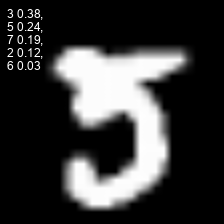


0: 224x224 9 0.34, 6 0.22, 5 0.14, 3 0.13, 8 0.11, 4.9ms
Speed: 1.6ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0320, 0.0016, 0.0170, 0.1324, 0.0024, 0.1402, 0.2185, 0.0058, 0.1134, 0.3367])
orig_shape: None
shape: torch.Size([10])
top1: 9
top1conf: tensor(0.3367)
top5: [9, 6, 5, 3, 8]
top5conf: tensor([0.3367, 0.2185, 0.1402, 0.1324, 0.1134])


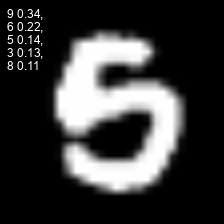


0: 224x224 5 0.50, 3 0.24, 2 0.18, 6 0.02, 8 0.02, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0035, 0.0009, 0.1844, 0.2423, 0.0025, 0.4978, 0.0250, 0.0108, 0.0224, 0.0104])
orig_shape: None
shape: torch.Size([10])
top1: 5
top1conf: tensor(0.4978)
top5: [5, 3, 2, 6, 8]
top5conf: tensor([0.4978, 0.2423, 0.1844, 0.0250, 0.0224])


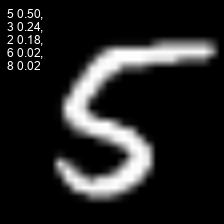


0: 224x224 5 0.57, 3 0.25, 2 0.08, 7 0.04, 9 0.02, 4.2ms
Speed: 1.1ms preprocess, 4.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0011, 0.0014, 0.0807, 0.2545, 0.0027, 0.5713, 0.0194, 0.0393, 0.0090, 0.0206])
orig_shape: None
shape: torch.Size([10])
top1: 5
top1conf: tensor(0.5713)
top5: [5, 3, 2, 7, 9]
top5conf: tensor([0.5713, 0.2545, 0.0807, 0.0393, 0.0206])


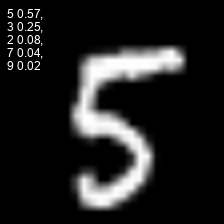


0: 224x224 5 0.39, 2 0.37, 3 0.11, 7 0.11, 6 0.01, 4.5ms
Speed: 0.9ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0010, 0.0004, 0.3738, 0.1145, 0.0054, 0.3885, 0.0059, 0.1083, 0.0007, 0.0014])
orig_shape: None
shape: torch.Size([10])
top1: 5
top1conf: tensor(0.3885)
top5: [5, 2, 3, 7, 6]
top5conf: tensor([0.3885, 0.3738, 0.1145, 0.1083, 0.0059])


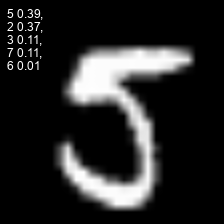


0: 224x224 5 0.28, 2 0.23, 7 0.22, 4 0.13, 3 0.09, 5.4ms
Speed: 0.9ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0034, 0.0139, 0.2309, 0.0940, 0.1255, 0.2751, 0.0213, 0.2194, 0.0062, 0.0104])
orig_shape: None
shape: torch.Size([10])
top1: 5
top1conf: tensor(0.2751)
top5: [5, 2, 7, 4, 3]
top5conf: tensor([0.2751, 0.2309, 0.2194, 0.1255, 0.0940])


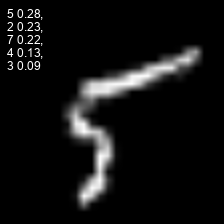


0: 224x224 2 0.46, 5 0.39, 7 0.08, 3 0.04, 4 0.01, 3.6ms
Speed: 2.2ms preprocess, 3.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0013, 0.0006, 0.4613, 0.0448, 0.0145, 0.3920, 0.0067, 0.0758, 0.0013, 0.0017])
orig_shape: None
shape: torch.Size([10])
top1: 2
top1conf: tensor(0.4613)
top5: [2, 5, 7, 3, 4]
top5conf: tensor([0.4613, 0.3920, 0.0758, 0.0448, 0.0145])


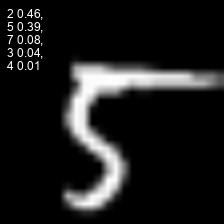


0: 224x224 5 0.56, 3 0.20, 2 0.14, 7 0.04, 6 0.03, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0028, 0.0008, 0.1376, 0.2011, 0.0020, 0.5593, 0.0252, 0.0378, 0.0126, 0.0208])
orig_shape: None
shape: torch.Size([10])
top1: 5
top1conf: tensor(0.5593)
top5: [5, 3, 2, 7, 6]
top5conf: tensor([0.5593, 0.2011, 0.1376, 0.0378, 0.0252])


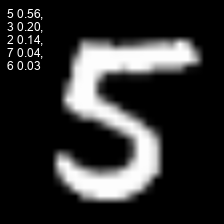

In [9]:
#載入圖像處裡套件
from google.colab.patches import cv2_imshow
import cv2
#宣告要偵測的資料夾
path  = './datasets/mnist160/test/5'
#變歷資料夾內的圖片
for a in os.listdir(path):
   #讀取圖片，用於後續畫圖使用
   img_path = os.path.join(path,a)
   origin_img = cv2.resize(cv2.imread(img_path),(224,224))
   #模型辨識（可以使用圖檔位置或是nparray）
   result = model(img_path)
   #若使用web/ipcam，在讀取影像後可以使用以下程式
   #result = model(origin_img)
   #將辨識結果進行打印
   for b in result:
        img = b.plot(img=origin_img.copy())
   #顯示結果
   print(b.probs.to('cpu'))
   cv2_imshow(img)